This project seeks to determine the best neighborhood in Pittsburgh. We define the "best" neighborhood as the one which is safest to live in. We determine the safety of each neighborhood by the number of fire incidents and police arrests occured there, relative to its population. We find it important to compare the number of dangerous events which have occured in a neighborhood relative to its total area because some neighborhoods may be vastly different sizes. We are not interested purely in the number of dangerous events which have occured in a neighborhood, but in the likelihood of a dangerous event occuring within meaningful proximity to one who lives in said neighborhood. 

Our metric is safety. The best neighborhood is the one which is the safest. In order to measure the safety of a neighborhood, we will be analyzing both the number of fire incidents and police arrests in each neighborhood relative to its population. Our datasets include fire incidents, police arrests, and population by neighborhood.

Number of Fires: 8142


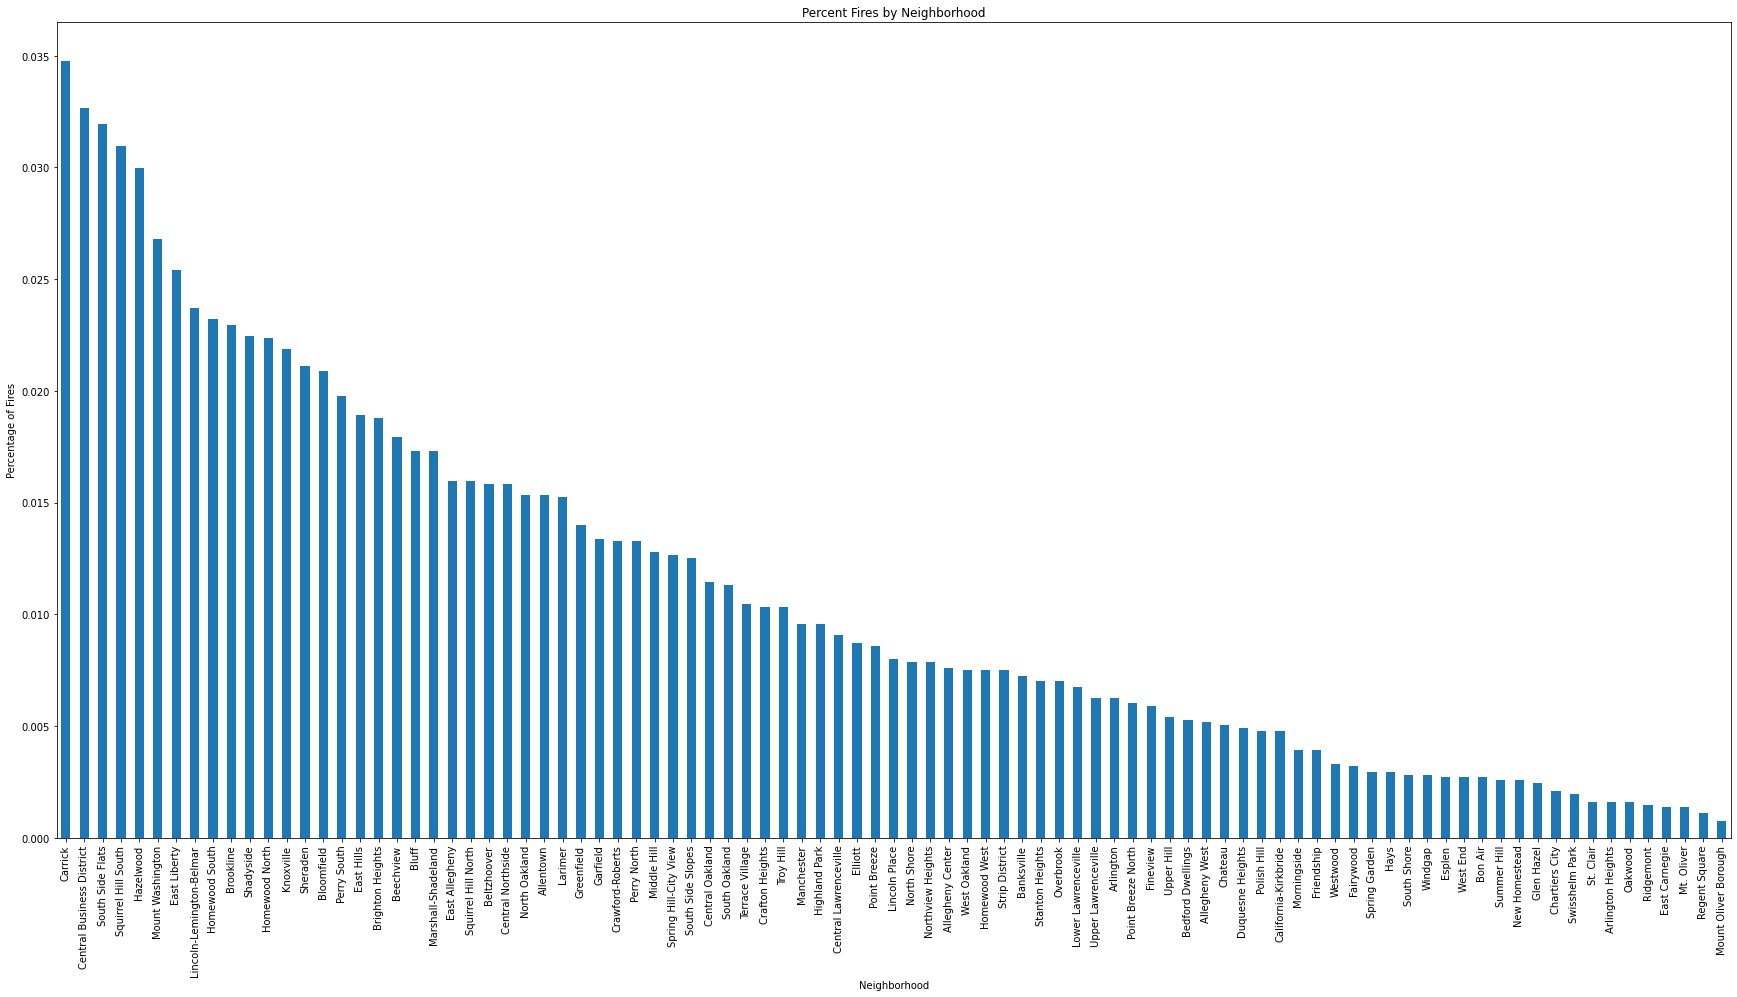

Number of Arrests: 62418


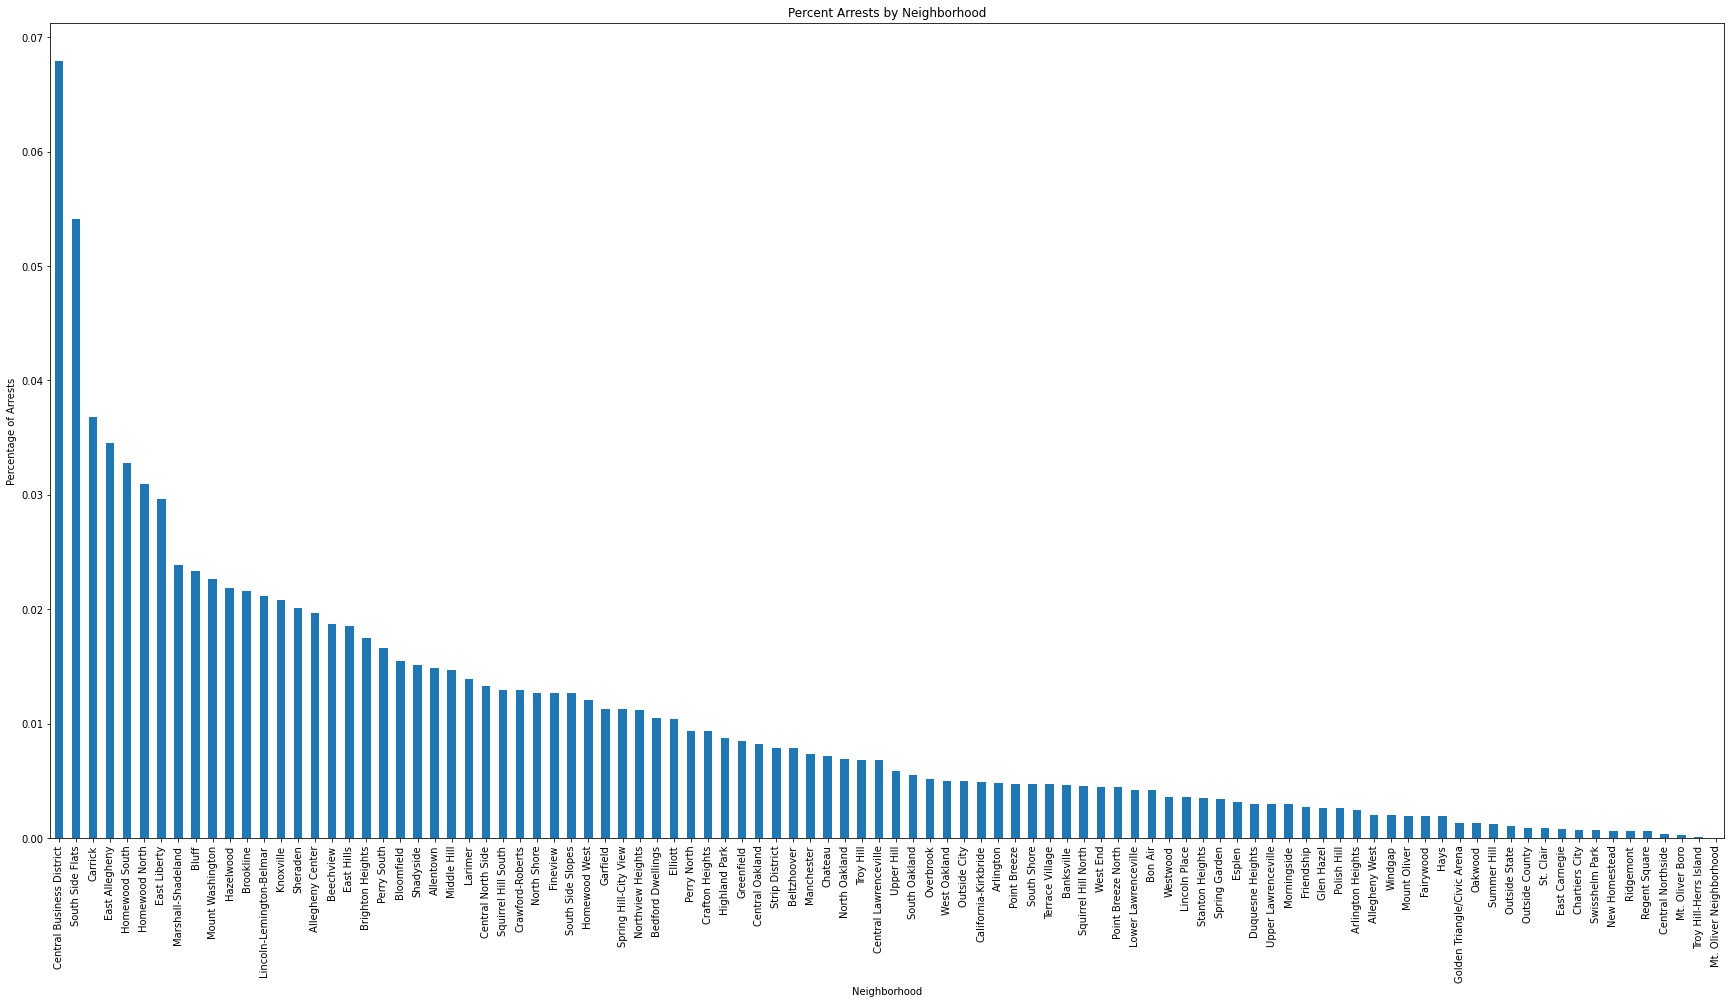

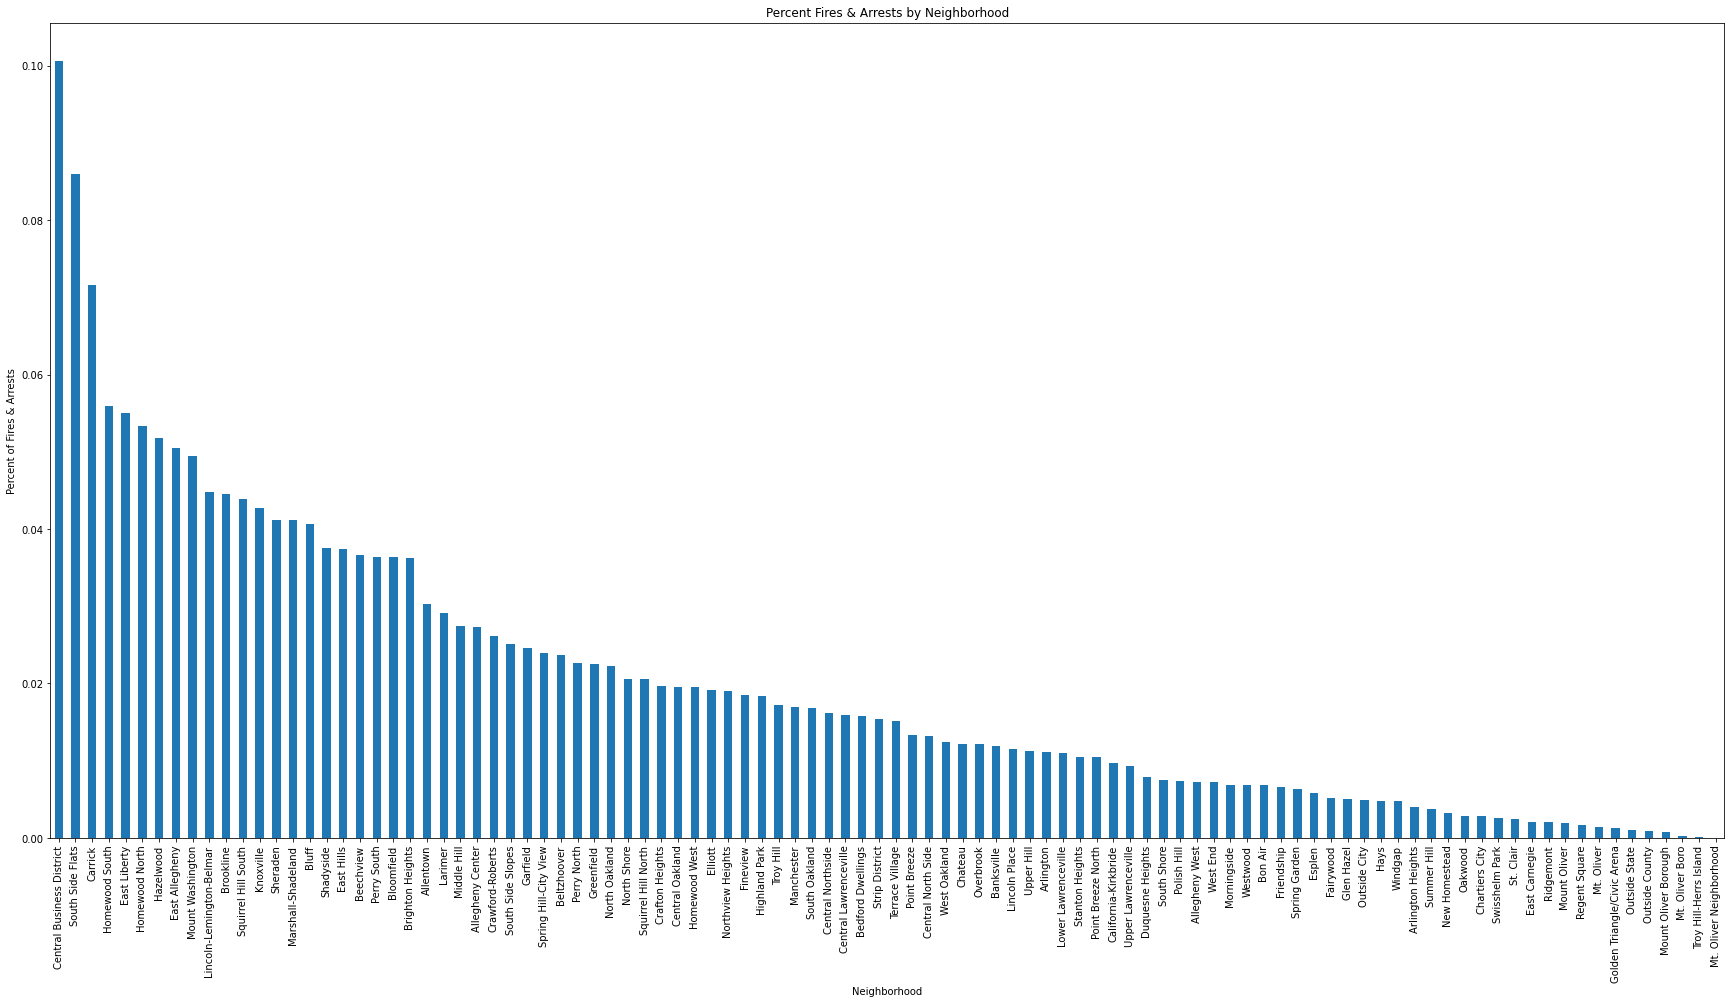

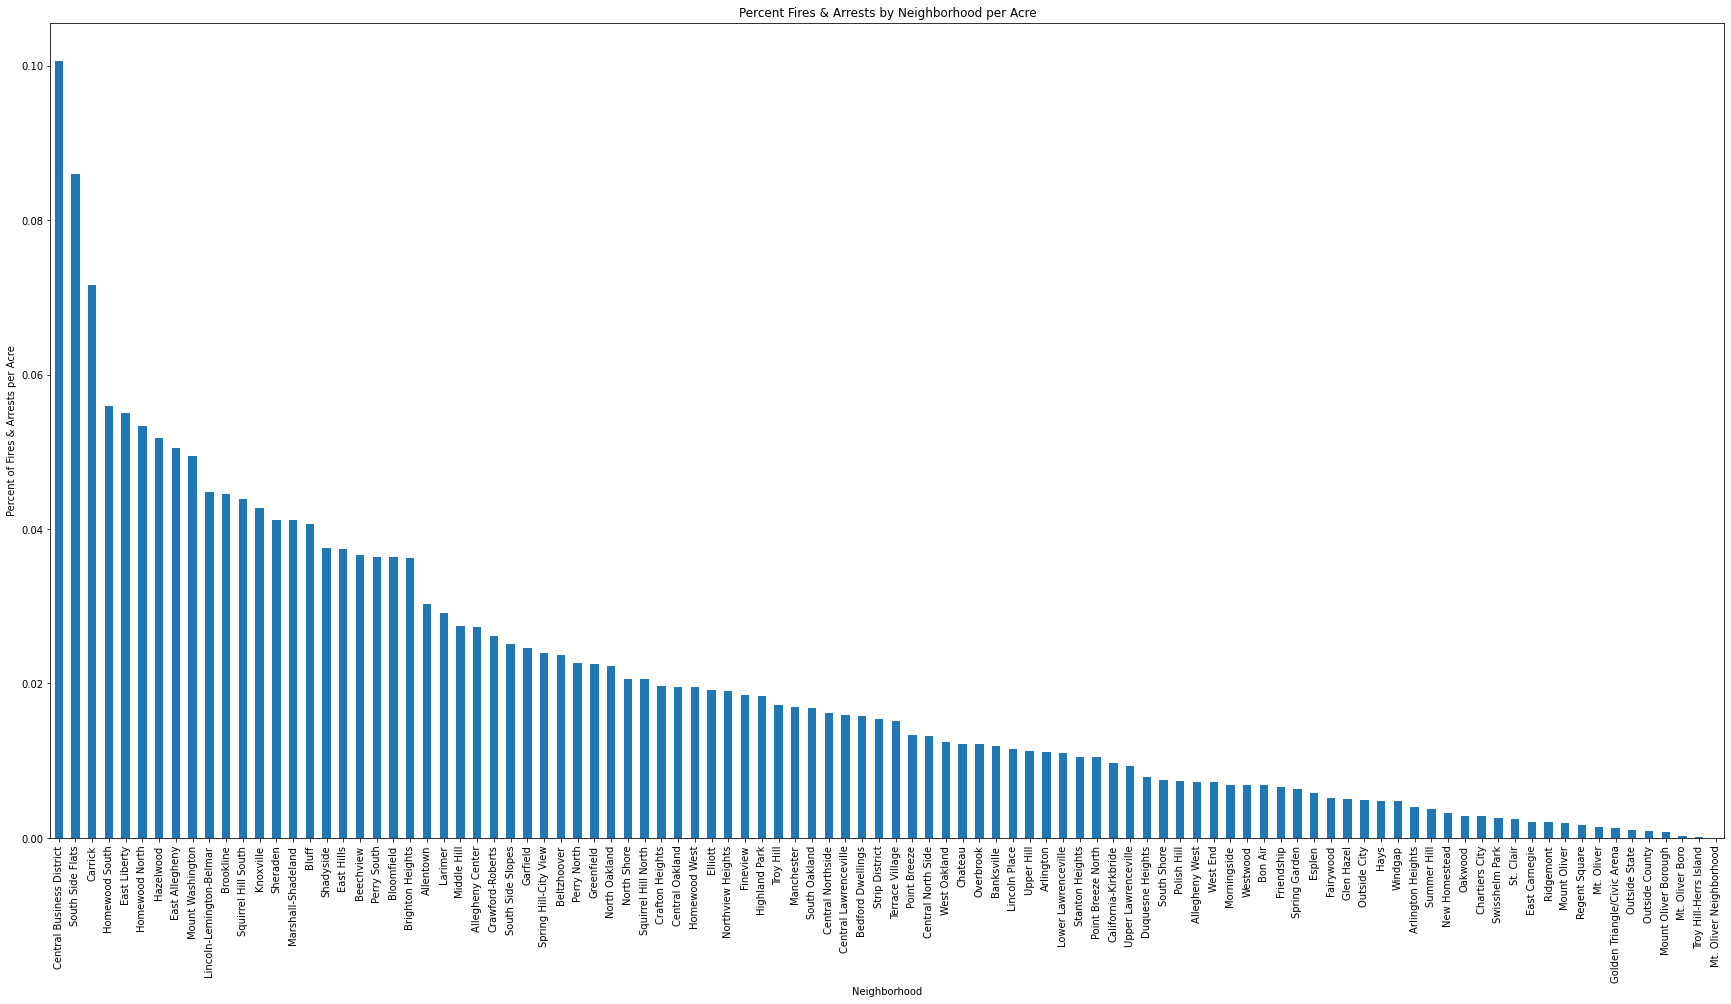

An interesting facet of our data is that arrests are far more likely to occur than fire incidents. While there were a total of 62418 total arrests, there were a total of 8142 recorded fires. If we simply summed all fires and all arrests which occured in a neighborhood, the quality of the neighborhood would be determined almost entirely by the number of arrests. Because we wanted to weigh fires and arrests equally, we summed not the total number of fires and arrests, but the percentages of fires and arrests which occured in each neighborhood. To do this, we calculated the total number of fires and the total number of arrests across all neighborhoods, then divided the number of arrests and number of fires which occured in each neighborhood by that sum. This yeilded the percentage of total fires and the percentage of total arrests which occured in each neighborhood.  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fires_data = pd.read_csv("FireIncidents.csv", sep=",")
fires = fires_data['neighborhood'].value_counts()
sum_fires = fires.sum()
print('Number of Fires: '+str(sum_fires))
percent_fires = fires.div(sum_fires)
percent_fires.plot(kind='bar', figsize=(30,15))
plt.title('Percent Fires by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Fires')
plt.show()

arrests_data = pd.read_csv("arrests.csv", sep=",")
arrests = arrests_data['INCIDENTNEIGHBORHOOD'].value_counts()
sum_arrests = arrests.sum()
print('Number of Arrests: '+str(sum_arrests))
percent_arrests = arrests.div(sum_arrests)
percent_arrests.plot(kind='bar', figsize=(30,15))
plt.title('Percent Arrests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percentage of Arrests')
plt.show()



We then summed those percentages to yeild the percentage of unsafe incidents which occured in each neighborhood, weighing fires and arrests as equal contributors to safety.  

In [ ]:
percent_arrests_and_fires = percent_fires.add(percent_arrests, fill_value=0).sort_values(ascending=False)
percent_arrests_and_fires.plot(kind='bar', figsize=(30,15))
plt.title('Percent Fires & Arrests by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Percent of Fires & Arrests')
plt.show()

We then divided the percentage of unsafe incidents in each neighborhood by its area, yeilding a metric which accurately represents the likelihood of an unsafe event occuring within meaningful proximity to one who lives in a neighborhood.

In [ ]:
area_data = pd.read_csv("neighborhood_area.csv")
area = area_data.groupby("hood").sum()['acres'].sort_values(ascending=False)
arrests_and_fires_by_area = percent_arrests_and_fires.div(area)
percent_arrests_and_fires.plot(kind='bar', figsize=(30,15))
plt.title('Percent Fires & Arrests by Neighborhood per Acre')
plt.xlabel('Neighborhood')
plt.ylabel('Percent of Fires & Arrests per Acre')
plt.show()

The Best Neighborhood: Apply the metric from the previous section to determine the best neighborhood in Pittsburgh. Beyond just executing code, provide a narrative about why you think this is the best neighborhood. Incorporate a data visualization, perhaps to rank all of the neighborhoods or show a neighborhood’s best-ness over time. The key is to make a data driven argument.


Conclusion: Reflect on how the data-driven determination of “best neighborhood” is the same or different from your personal favorite neighborhood. Each member of the group should write their own response to this.